In [155]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv("sa_results_k_1.csv")

In [208]:
df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
0,burma14,14,3323,3559,3559,3461,1.071020,1.071020,1.041529,1,1,3.814784
1,ulysses16,16,6859,6982,6982,6870,1.017933,1.017933,1.001604,1,1,3.702278
2,gr17,17,2085,2211,2211,2159,1.060432,1.060432,1.035492,1,1,4.409657
3,gr21,21,2707,2879,2879,2707,1.063539,1.063539,1.000000,1,1,4.118733
4,ulysses22,22,7013,7382,7382,7326,1.052617,1.052617,1.044631,1,1,5.466969
...,...,...,...,...,...,...,...,...,...,...,...,...
85,u1432,1432,152970,171495,171495,171495,1.121102,1.121102,1.121102,1,1,357.586053
86,d1655,1655,62128,70939,70939,70939,1.141820,1.141820,1.141820,1,1,1212.303680
87,vm1748,1748,336556,379373,379373,379373,1.127221,1.127221,1.127221,1,1,587.269710
88,u1817,1817,57201,66055,66055,66055,1.154788,1.154788,1.154788,1,1,623.925832


In [209]:
sample_index = [6, 8, 9, 12, 15, 16, 38, 40, 43, 70]
sample_df = df.iloc[sample_index]

In [210]:
sample_df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
6,fri26,26,937,988,988,966,1.054429,1.054429,1.030950,1,1,4.181910
8,bays29,29,2020,2188,2188,2033,1.083168,1.083168,1.006436,1,1,6.582876
9,swiss42,42,1273,1399,1399,1385,1.098979,1.098979,1.087981,1,1,7.350862
12,hk48,48,11461,13059,13059,11611,1.139429,1.139429,1.013088,1,1,8.368526
15,brazil58,58,25395,27495,27495,26043,1.082693,1.082693,1.025517,1,1,9.452385
16,st70,70,675,768,768,732,1.137778,1.137778,1.084444,1,1,11.904294
38,kroB150,150,26130,29669,29669,28865,1.135438,1.135438,1.104669,1,1,19.257292
40,pr152,152,73682,79317,79317,77100,1.076477,1.076477,1.046389,1,1,27.336388
43,rat195,195,2323,2704,2704,2692,1.164012,1.164012,1.158846,1,1,30.644579
70,d657,657,48912,54891,54891,54891,1.122240,1.122240,1.122240,1,1,182.602275


In [212]:
# get min, max, avg c_apx_ratio, best_sa_apx_ratio
min_c_apx_ratio = sample_df['c_apx_ratio'].min()
max_c_apx_ratio = sample_df['c_apx_ratio'].max()
avg_c_apx_ratio = sample_df['c_apx_ratio'].mean()
print(min_c_apx_ratio, max_c_apx_ratio, avg_c_apx_ratio)


1.0544290288153682 1.164012053379251 1.1094644208904287


In [213]:
# get min, max, avg best of best_sa_apx_ratio
min_c_apx_ratio = sample_df["best_sa_apx_ratio"].min()
max_c_apx_ratio = sample_df["best_sa_apx_ratio"].max()
avg_c_apx_ratio = sample_df["best_sa_apx_ratio"].mean()
print(min_c_apx_ratio, max_c_apx_ratio, avg_c_apx_ratio)

1.0064356435643564 1.1588463194145502 1.0680559529955553


In [214]:
sample_df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
6,fri26,26,937,988,988,966,1.054429,1.054429,1.030950,1,1,4.181910
8,bays29,29,2020,2188,2188,2033,1.083168,1.083168,1.006436,1,1,6.582876
9,swiss42,42,1273,1399,1399,1385,1.098979,1.098979,1.087981,1,1,7.350862
12,hk48,48,11461,13059,13059,11611,1.139429,1.139429,1.013088,1,1,8.368526
15,brazil58,58,25395,27495,27495,26043,1.082693,1.082693,1.025517,1,1,9.452385
16,st70,70,675,768,768,732,1.137778,1.137778,1.084444,1,1,11.904294
38,kroB150,150,26130,29669,29669,28865,1.135438,1.135438,1.104669,1,1,19.257292
40,pr152,152,73682,79317,79317,77100,1.076477,1.076477,1.046389,1,1,27.336388
43,rat195,195,2323,2704,2704,2692,1.164012,1.164012,1.158846,1,1,30.644579
70,d657,657,48912,54891,54891,54891,1.122240,1.122240,1.122240,1,1,182.602275


In [215]:
# keep name, dimension, c_apx_ratio, best_sa_apx_ratio
sample_df = sample_df[["name", "dimension", "c_apx_ratio", "best_sa_apx_ratio"]]
# add improvement column
sample_df["improvement"] = sample_df["c_apx_ratio"] - sample_df["best_sa_apx_ratio"]

C:\Users\utchchhwas\AppData\Local\Temp\ipykernel_15596\325219365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df["improvement"] = sample_df["c_apx_ratio"] - sample_df["best_sa_apx_ratio"]


In [ ]:
# round to 6 decimal places
sample_df = sample_df.round(6)
# save to csv
sample_df.to_csv("c_sa_sample.csv", index=False)

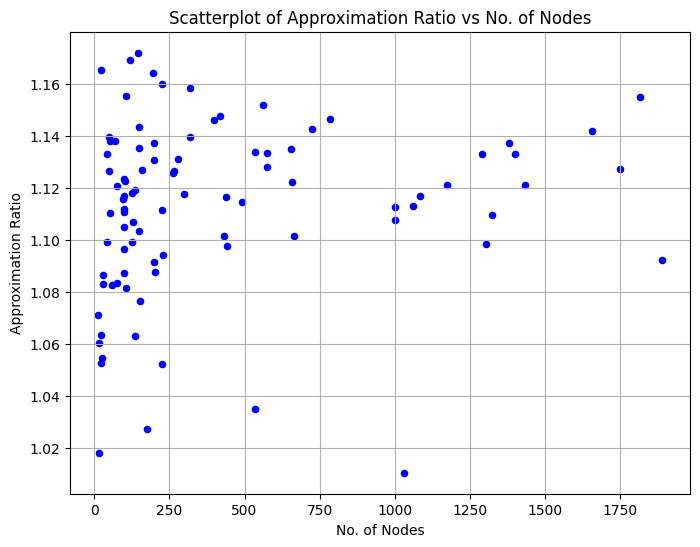

In [157]:
plt.figure(figsize=(8, 6))
plt.scatter(df["dimension"], df["c_apx_ratio"], s=20, c='b', marker='o')
plt.xlabel("No. of Nodes")
plt.ylabel("Approximation Ratio")
plt.title("Scatterplot of Approximation Ratio vs No. of Nodes")
plt.grid(True)
plt.show()

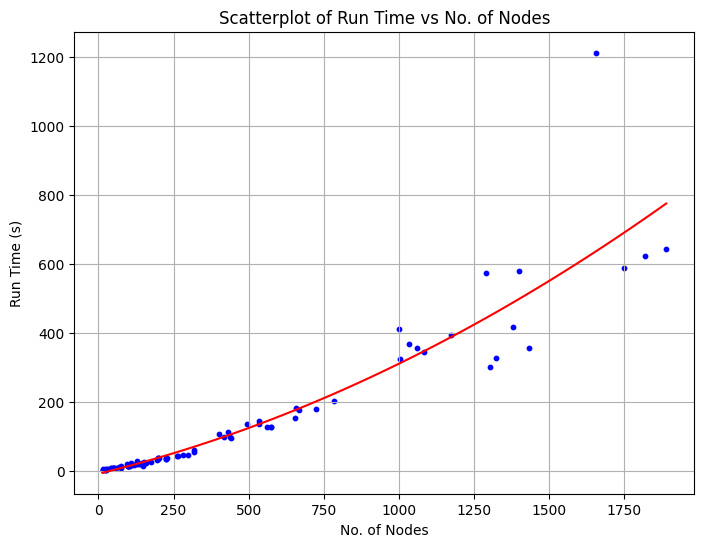

In [158]:
plt.figure(figsize=(8, 6))
plt.scatter(df["dimension"], df["elapsed_time"], s=10, c="b", marker="o")
plt.xlabel("No. of Nodes")
plt.ylabel("Run Time (s)")
plt.title("Scatterplot of Run Time vs No. of Nodes")

# Assuming your x data is in df["dimension"] and y data is in df["elapsed_time"]
x = df["dimension"]
y = df["elapsed_time"]

# Fit a polynomial of degree 2 (you can adjust the degree as needed)
coefficients = np.polyfit(x, y, 2)

# Generate x values for the fitted line (more points lead to smoother line)
x_fit = np.linspace(min(x), max(x), 100)

# Calculate y values for the fitted line using the coefficients
y_fit = np.polyval(coefficients, x_fit)

# Plot the fitted line on the existing scatter plot
plt.plot(x_fit, y_fit, color="r", linestyle="-")

plt.grid(True)
plt.show()

In [159]:
# minimum, maximum, and average c_apx_ratio
min_c_apx_ratio = df["c_apx_ratio"].min()
max_c_apx_ratio = df["c_apx_ratio"].max()
avg_c_apx_ratio = df["c_apx_ratio"].mean()

In [160]:
print("Minimum c_apx_ratio: ", min_c_apx_ratio)
print("Maximum c_apx_ratio: ", max_c_apx_ratio)
print("Average c_apx_ratio: ", avg_c_apx_ratio)

Minimum c_apx_ratio:  1.010480302212628
Maximum c_apx_ratio:  1.171857116012095
Average c_apx_ratio:  1.112459593402852


In [161]:
# calculate and print the min, max and avg sa_apx_ratio
min_sa_apx_ratio = df["best_sa_apx_ratio"].min()
max_sa_apx_ratio = df["best_sa_apx_ratio"].max()
avg_sa_apx_ratio = df["best_sa_apx_ratio"].mean()

# print the results
print("Minimum best_sa_apx_ratio: ", min_sa_apx_ratio)
print("Maximum best_sa_apx_ratio: ", max_sa_apx_ratio)
print("Average best_sa_apx_ratio: ", avg_sa_apx_ratio)

Minimum best_sa_apx_ratio:  1.0
Maximum best_sa_apx_ratio:  1.1598999614279135
Average best_sa_apx_ratio:  1.0955735404298463


In [162]:
# prepare a new dataframe with name, dimension, c_apx_ratio, best_sa_apx_ratio
new_df = df[["name", "dimension", "c_apx_ratio", "best_sa_apx_ratio"]]

In [163]:
sample_index = [6, 8, 9, 12, 15, 16, 38, 40, 43, 70]

In [164]:
# sample from sample_index
sample_df = new_df.iloc[sample_index]
sample_df = sample_df.sort_values(by="dimension")

In [165]:
# calculate difference between c_apx_ratio and best_sa_apx_ratio
sample_df["improvement"] = sample_df["c_apx_ratio"] - sample_df["best_sa_apx_ratio"]

In [166]:
# round to 6 decimal places
sample_df = sample_df.round(6)

In [167]:
sample_df

,name,dimension,c_apx_ratio,best_sa_apx_ratio,improvement
6,fri26,26,1.054429,1.030950,0.023479
8,bays29,29,1.083168,1.006436,0.076733
9,swiss42,42,1.098979,1.087981,0.010998
12,hk48,48,1.139429,1.013088,0.126342
15,brazil58,58,1.082693,1.025517,0.057177
16,st70,70,1.137778,1.084444,0.053333
38,kroB150,150,1.135438,1.104669,0.030769
40,pr152,152,1.076477,1.046389,0.030089
43,rat195,195,1.164012,1.158846,0.005166
70,d657,657,1.122240,1.122240,0.000000


In [168]:
# save to csv
sample_df.to_csv("sa_samples.csv", index=False)

In [169]:
# get index of sample_df
sample_index = sample_df.index
print(sample_index)

Index([6, 8, 9, 12, 15, 16, 38, 40, 43, 70], dtype='int64')


In [170]:
# read sa_results.csv
df = pd.read_csv("sa_results.csv")

In [171]:
df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
0,burma14,14,3323,3559,3413,3323,1.071020,1.027084,1.000000,14,6,37.684161
1,ulysses16,16,6859,6982,6982,6859,1.017933,1.017933,1.000000,1,7,43.282650
2,gr17,17,2085,2211,2164,2085,1.060432,1.037890,1.000000,6,12,41.661587
3,gr21,21,2707,2879,2855,2707,1.063539,1.054673,1.000000,12,2,46.837058
4,ulysses22,22,7013,7382,7295,7013,1.052617,1.040211,1.000000,10,9,47.001259
...,...,...,...,...,...,...,...,...,...,...,...,...
68,rat575,575,6773,7677,7677,7677,1.133471,1.133471,1.133471,1,1,850.260298
69,p654,654,34643,39317,38433,38433,1.134919,1.109402,1.109402,3,3,1048.380945
70,d657,657,48912,54891,54643,54643,1.122240,1.117170,1.117170,9,9,1343.625880
71,gr666,666,294358,324271,324271,324271,1.101621,1.101621,1.101621,1,1,1312.159589


In [172]:
# min, max, avg of c_apx_ratio
min_c_apx_ratio = df["c_apx_ratio"].min()
max_c_apx_ratio = df["c_apx_ratio"].max()
avg_c_apx_ratio = df["c_apx_ratio"].mean()
# print the results
print("Minimum c_apx_ratio: ", min_c_apx_ratio)
print("Maximum c_apx_ratio: ", max_c_apx_ratio)
print("Average c_apx_ratio: ", avg_c_apx_ratio)

Minimum c_apx_ratio:  1.0179326432424551
Maximum c_apx_ratio:  1.171857116012095
Average c_apx_ratio:  1.11157471343624


In [173]:
# min, max, avg of c_apx_ratio
min_c_apx_ratio = df["best_apx_ratio"].min()
max_c_apx_ratio = df["best_apx_ratio"].max()
avg_c_apx_ratio = df["best_apx_ratio"].mean()
# print the results
print("Minimum best_apx_ratio: ", min_c_apx_ratio)
print("Maximum best_apx_ratio: ", max_c_apx_ratio)
print("Average best_apx_ratio: ", avg_c_apx_ratio)

Minimum best_apx_ratio:  1.0179326432424551
Maximum best_apx_ratio:  1.1487638268486606
Average best_apx_ratio:  1.0929558726254942


In [174]:
# min, max, avg of c_apx_ratio
min_c_apx_ratio = df["best_sa_apx_ratio"].min()
max_c_apx_ratio = df["best_sa_apx_ratio"].max()
avg_c_apx_ratio = df["best_sa_apx_ratio"].mean()
# print the results
print("Minimum best_sa_apx_ratio: ", min_c_apx_ratio)
print("Maximum best_sa_apx_ratio: ", max_c_apx_ratio)
print("Average best_sa_apx_ratio: ", avg_c_apx_ratio)

Minimum best_sa_apx_ratio:  1.0
Maximum best_sa_apx_ratio:  1.1456040633692104
Average best_sa_apx_ratio:  1.060291879567886


In [175]:
# sample df using sample_index
sample_df = df.iloc[sample_index]

In [176]:
sample_df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
6,fri26,26,937,988,972,937,1.054429,1.037353,1.000000,10,7,53.838427
8,bays29,29,2020,2188,2118,2028,1.083168,1.048515,1.003960,11,15,59.614316
9,swiss42,42,1273,1399,1361,1285,1.098979,1.069128,1.009427,16,19,80.120007
12,hk48,48,11461,13059,12506,11580,1.139429,1.091179,1.010383,13,4,91.036500
15,brazil58,58,25395,27495,27110,25475,1.082693,1.067533,1.003150,2,2,137.773133
16,st70,70,675,768,747,688,1.137778,1.106667,1.019259,9,14,151.673797
38,kroB150,150,26130,29669,29550,27899,1.135438,1.130884,1.067700,6,19,260.360064
40,pr152,152,73682,79317,78688,75138,1.076477,1.067941,1.019761,14,14,308.256543
43,rat195,195,2323,2704,2629,2547,1.164012,1.131726,1.096427,13,1,393.912330
70,d657,657,48912,54891,54643,54643,1.122240,1.117170,1.117170,9,9,1343.625880


In [177]:
# keep only name, dimension, c_apx_ration, best_apx_ration, and best_tour_k
sample_df = sample_df[
    ["name", "dimension", "c_apx_ratio", "best_apx_ratio", "best_tour_k"]
]

In [178]:
# add improvement column
sample_df["improvement"] = sample_df["c_apx_ratio"] - sample_df["best_apx_ratio"]

C:\Users\utchchhwas\AppData\Local\Temp\ipykernel_15596\1208476007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df["improvement"] = sample_df["c_apx_ratio"] - sample_df["best_apx_ratio"]


In [179]:
sample_df

,name,dimension,c_apx_ratio,best_apx_ratio,best_tour_k,improvement
6,fri26,26,1.054429,1.037353,10,0.017076
8,bays29,29,1.083168,1.048515,11,0.034653
9,swiss42,42,1.098979,1.069128,16,0.029851
12,hk48,48,1.139429,1.091179,13,0.048251
15,brazil58,58,1.082693,1.067533,2,0.015160
16,st70,70,1.137778,1.106667,9,0.031111
38,kroB150,150,1.135438,1.130884,6,0.004554
40,pr152,152,1.076477,1.067941,14,0.008537
43,rat195,195,1.164012,1.131726,13,0.032286
70,d657,657,1.122240,1.117170,9,0.005070


In [180]:
# round to 6 decimal places
sample_df = sample_df.round(6)
# save to csv
sample_df.to_csv("christofides_random_samples.csv", index=False)

In [181]:
# sample df using sample_index
sample_df = df.iloc[sample_index]

In [182]:
sample_df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
6,fri26,26,937,988,972,937,1.054429,1.037353,1.000000,10,7,53.838427
8,bays29,29,2020,2188,2118,2028,1.083168,1.048515,1.003960,11,15,59.614316
9,swiss42,42,1273,1399,1361,1285,1.098979,1.069128,1.009427,16,19,80.120007
12,hk48,48,11461,13059,12506,11580,1.139429,1.091179,1.010383,13,4,91.036500
15,brazil58,58,25395,27495,27110,25475,1.082693,1.067533,1.003150,2,2,137.773133
16,st70,70,675,768,747,688,1.137778,1.106667,1.019259,9,14,151.673797
38,kroB150,150,26130,29669,29550,27899,1.135438,1.130884,1.067700,6,19,260.360064
40,pr152,152,73682,79317,78688,75138,1.076477,1.067941,1.019761,14,14,308.256543
43,rat195,195,2323,2704,2629,2547,1.164012,1.131726,1.096427,13,1,393.912330
70,d657,657,48912,54891,54643,54643,1.122240,1.117170,1.117170,9,9,1343.625880


In [183]:
# keep only name, dimension, c_apx_ration, best_sa_apx_ration, and best_sa_tour_k
sample_df = sample_df[
    ["name", "dimension", "c_apx_ratio", "best_sa_apx_ratio", "best_sa_tour_k"]
]

In [184]:
sample_df

,name,dimension,c_apx_ratio,best_sa_apx_ratio,best_sa_tour_k
6,fri26,26,1.054429,1.000000,7
8,bays29,29,1.083168,1.003960,15
9,swiss42,42,1.098979,1.009427,19
12,hk48,48,1.139429,1.010383,4
15,brazil58,58,1.082693,1.003150,2
16,st70,70,1.137778,1.019259,14
38,kroB150,150,1.135438,1.067700,19
40,pr152,152,1.076477,1.019761,14
43,rat195,195,1.164012,1.096427,1
70,d657,657,1.122240,1.117170,9


In [185]:
# round to 6 decimal places
sample_df = sample_df.round(6)
# save to csv
sample_df.to_csv("christofides_random_sa_samples.csv", index=False)

In [186]:
# read sa_results.csv
df = pd.read_csv("sa_results.csv")

In [187]:
df

,name,dimension,opt_tour_length,c_tour_length,best_tour_length,best_sa_tour_length,c_apx_ratio,best_apx_ratio,best_sa_apx_ratio,best_tour_k,best_sa_tour_k,elapsed_time
0,burma14,14,3323,3559,3413,3323,1.071020,1.027084,1.000000,14,6,37.684161
1,ulysses16,16,6859,6982,6982,6859,1.017933,1.017933,1.000000,1,7,43.282650
2,gr17,17,2085,2211,2164,2085,1.060432,1.037890,1.000000,6,12,41.661587
3,gr21,21,2707,2879,2855,2707,1.063539,1.054673,1.000000,12,2,46.837058
4,ulysses22,22,7013,7382,7295,7013,1.052617,1.040211,1.000000,10,9,47.001259
...,...,...,...,...,...,...,...,...,...,...,...,...
68,rat575,575,6773,7677,7677,7677,1.133471,1.133471,1.133471,1,1,850.260298
69,p654,654,34643,39317,38433,38433,1.134919,1.109402,1.109402,3,3,1048.380945
70,d657,657,48912,54891,54643,54643,1.122240,1.117170,1.117170,9,9,1343.625880
71,gr666,666,294358,324271,324271,324271,1.101621,1.101621,1.101621,1,1,1312.159589


In [190]:
# get c_apx_ratio, best_apx_ratio, and best_sa_apx_ratio
c_apx_ratio = df["c_apx_ratio"].tolist()
best_apx_ratio = df["best_apx_ratio"].tolist()
best_sa_apx_ratio = df["best_sa_apx_ratio"].tolist()

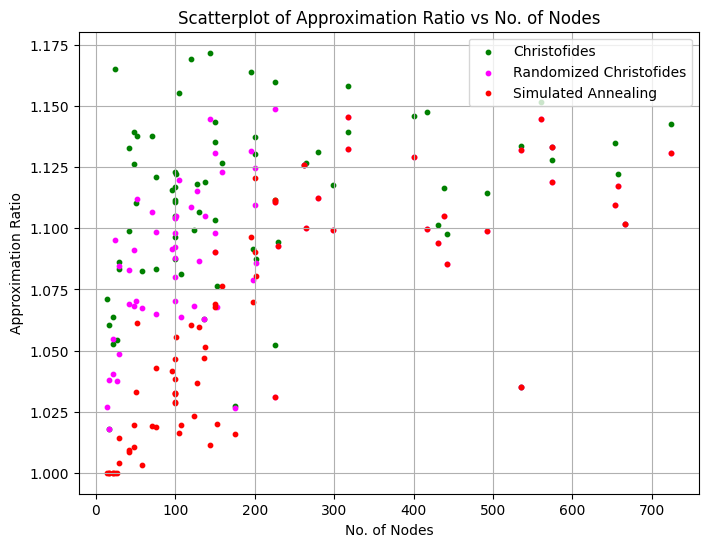

In [206]:
# scatter plot c_apx_ratio, best_apx_ratio, and best_sa_apx_ratio vs dimension using different colors
plt.figure(figsize=(8, 6))
plt.scatter(df["dimension"], c_apx_ratio, s=10, c="green", marker="o", label="Christofides")
plt.scatter(
    df["dimension"],
    best_apx_ratio,
    s=10,
    c="magenta",
    marker="o",
    label="Randomized Christofides",
)
plt.scatter(df["dimension"], best_sa_apx_ratio, s=10, c="r", marker="o", label="Simulated Annealing")
plt.xlabel("No. of Nodes")
plt.ylabel("Approximation Ratio")
plt.title("Scatterplot of Approximation Ratio vs No. of Nodes")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

